# Анализ успешности компьютерных игр в интернет-магазине "Стримчик"

В рамках данного проекта, мы проведем анализ данных о продажах компьютерных игр, оценках пользователей и экспертов, жанрах, платформах и возрастных рейтингах в интернет-магазине "Стримчик". Наша задача заключается в выявлении факторов, которые влияют на успешность игры и позволяют прогнозировать будущие популярные продукты, а также эффективно планировать рекламные кампании.

## Краткое резюме проекта:

Наши исследования будут базироваться на наборе данных, который включает в себя информацию о 16715 играх, выпущенных до 2016 года. Мы располагаем данными о названии игры, платформе, годе выпуска, жанре, объемах продаж в различных регионах (Северная Америка, Европа, Япония, другие страны), оценках критиков и пользователей, а также возрастном рейтинге, присвоенном организацией ESRB.

Этот анализ имеет особое значение в свете текущей ситуации: предполагается, что мы находимся в декабре 2016 года, и нам необходимо подготовиться к кампании на 2017 год. Наша цель - разработать работающий принцип работы с данными, который может быть использован как для прогнозирования продаж в следующем году на основе данных текущего года, так и для будущих прогнозов, если нам потребуются данные на другой временной горизонт.

Наша основная цель - провести анализ, выделить ключевые тренды и закономерности в данных, которые позволят нам принимать обоснованные решения в планировании продаж и маркетинговых стратегий. В конечном итоге, эффективное использование данных может существенно повлиять на успех продаж и развитие нашего интернет-магазина.

## План работы:

1. **Загрузка данных и первичный просмотр:**
   - Прочитаем и ознакомимся с данными для дальнейшего анализа.


2. **Предобработка данных:**
   - Изменим типы данных в столбцах, где это необходимо, для более удобного анализа.
   - Обработаем дубликаты и пропущенные значения, где это возможно.
   - Создадим новый столбец с общим количеством проданных игр, сложив продажи рарзных регионов


3. **Исследовательский анализ данных (EDA):**
   - Посмотрим, сколько игр выпускалось в разные годы. Ответим на вопрос, важны ли данные за все периоды?
   - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос, за какой характерный срок появляются новые и исчезают старые платформы?
   - Возьмем данные за соответствующий актуальный период.
   - Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
   - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
   - Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


4. **Портрет пользователя каждого региона:**
    
    Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5).
    - Самые популярные жанры (топ-5).
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


5. **Проверка гипотез:**
   - Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные или нет?
   
   
На основе этого плана мы приступим к анализу данных интернет-магазина "Стримчик" и выявим полезные инсайты, которые помогут улучшить работу бизнеса и обеспечить правдивые данные для будущего года.

## Загрузим библиотеки, откроем файлы и просмотрим данные.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

In [ ]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод:**

Наш DataFrame имеет следующие характеристики:

Общее количество строк: 16715

Количество столбцов: 11

Столбцы и их описание:

- `Name`: Название игры.
- `Platform`: Платформа, на которой выпущена игра.
- `Year_of_Release`: Год выпуска игры.
- `Genre`: Жанр игры.
- `NA_sales`: Продажи в Северной Америке (в миллионах проданных копий).
- `EU_sales`: Продажи в Европе (в миллионах проданных копий).
- `JP_sales`: Продажи в Японии (в миллионах проданных копий).
- `Other_sales`: Продажи в других странах (в миллионах проданных копий).
- `Critic_Score`: Оценка критиков (максимум 100).
- `User_Score`: Оценка пользователей (максимум 10).
- `Rating`: Рейтинг от организации ESRB (англ. Entertainment Software Rating Board). ESRB присваивает играм возрастные категории в соответствии с их содержанием.

## Предобработка

In [ ]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [ ]:
# проверим на дубликаты
data.duplicated().sum() # дубликатов нет

0

In [ ]:
# обработаем пропущенные значения
data['name'].isna().sum() # 2 пропуска, это 0.1%, можно удалить

2

In [ ]:
# удалим пропущенные значения в столбце названия игры
data = data.dropna(subset=['name'])

In [ ]:
# проверим на неявные дубликаты
duplicate_columns = ['name', 'platform', 'year_of_release']
data[duplicate_columns].duplicated().sum()

1

In [ ]:
# удалим неявные дубликаты
duplicates = data[duplicate_columns].duplicated()
data = data[~duplicates]

In [ ]:
# рассмотрим столбец с информацией о годах выпуска игр
data['year_of_release'].isna().sum()

269

In [ ]:
# некоторые игры выходят сразу на нескольких платформах в один и тот же год, поэтому заменим некоторые пропуски
max_year_per_game = data.groupby('name')['year_of_release'].max()

# Заполняем пропущенные значения в столбце 'год' на основе данных из группировки
data['year_of_release'] = data.apply(lambda row: max_year_per_game[row['name']] if pd.isna(row['year_of_release']) else row['year_of_release'], axis=1)

In [ ]:
data['year_of_release'].isna().sum() # осталось 146 пропусков, это 0.8%

146

In [ ]:
# удалим пропуски в столбце о годе релиза игры
data = data.dropna(subset=['year_of_release'])

**Вывод:**

На данном этапе анализа были проведены первичные операции с данными. Важно отметить, что в исходном датасете не было обнаружено явных дубликатов строк. Однако из-за наличия пропущенных значений было принято решение удалить 0.1% строк, где были пропуски в столбце с названием игр, и 0.8% строк, содержащих пропуски в столбце с годом выпуска игры. Также стоит отметить, что удалось восстановить часть пропусков в столбце с годом выпуска благодаря тому, что игры на разных платформах часто выходят в один и тот же год. Это позволило нам восстановить часть данных и снизить количество пропусков.

In [ ]:
# Комментарий ревьюера
# Создадим копию датасета перед преобразованием
temp = data.copy()

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
# заменим строковое nan в user_score на пропуск
# data['user_score'] = data['user_score'].replace('nan', None)

# заменим строковое tbd в user_score на пропуск
# data['user_score'] = data['user_score'].replace('tbd', None)

In [ ]:
# заменим строковое tbd в user_score на пропуск
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Среди оценок присутствует значение tbd, которое обозначает "to be determined/decided", значит, что оценка от пользователей еще не определена. Заменили ее также на None.

In [ ]:
# изменим тип данных, где это нужно
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')

Теперь посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# посмотрим на результат
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16566 non-null  object 
 1   platform         16566 non-null  object 
 2   year_of_release  16566 non-null  int64  
 3   genre            16566 non-null  object 
 4   na_sales         16566 non-null  float64
 5   eu_sales         16566 non-null  float64
 6   jp_sales         16566 non-null  float64
 7   other_sales      16566 non-null  float64
 8   critic_score     8074 non-null   float64
 9   user_score       7539 non-null   float64
 10  rating           9867 non-null   object 
 11  total_sales      16566 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Пропуски в столбце `rating` объясняются тем, что рейтинг ESRB предназначен для маркировки игр для США и Канады, а для других регионов он часто не заполняется, мы можем использовать значение, которое отражает отсутствие рейтинга вне США и Канады. Например, можно использовать "NR" (Not Rated) в качестве заглушки для пропущенных значений в столбце рейтингов.

Этот подход поможет сохранить данные о рейтингах для США и Канады, а также позволит нам учитывать игры без рейтинга в других регионах при анализе. Это дает возможность извлечь полезную информацию из данных о продажах, даже если рейтинг для некоторых регионов отсутствует.

In [ ]:
data['rating'] = data['rating'].fillna('NR')

**Вывод:**

Дополнительно в процессе очистки данных мы столкнулись с особенностью столбца `user_score`, который содержал значение "tbd" (to be determined/decided). Это обозначение указывает на то, что оценка от пользователей еще не определена. Было принято решение заменить такие значения на пропуски.

Также была поставлена заглушка на пропусках столбца `rating` со значением NR = not rated.

Кроме того, для удобства анализа и расчетов, был добавлен дополнительный столбец `total_sales`, который для каждой строки суммирует продажи игр во всех регионах. Это позволило создать единый показатель общих продаж игры в миллионах копий, что упрощает сравнение и анализ успешности игр на различных платформах и в разных регионах.

**+ к выводу:**

Пропуски в данных могли появиться по разным причинам:

- **Недостаточные записи:** Возможно, не все игры были полностью зарегистрированы в базе данных, поэтому названия, годы релиза и оценки могли быть упущены.

- **Технические проблемы:** При сборе или хранении данных могли возникнуть технические проблемы, которые могли привести к потере информации.

- **Отсутствие данных:** Иногда разработчики игр или издатели не предоставляют полную информацию о названиях, годах выпуска и рейтингах.

- **Исторические изменения:** Время от времени критерии оценок и рейтингов могут меняться. Некоторые старые игры могли быть оценены, но данные не были сохранены или они были утеряны.

- **Человеческий фактор:** Ошибки при внесении данных вручную или автоматически могли привести к пропускам.

- **Неполные данные:** Возможно, часть данных была утеряна или не была включена в исходный набор из-за ограничений на сбор данных.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

In [ ]:
# data['year_of_release'].plot(kind='hist', bins=35)

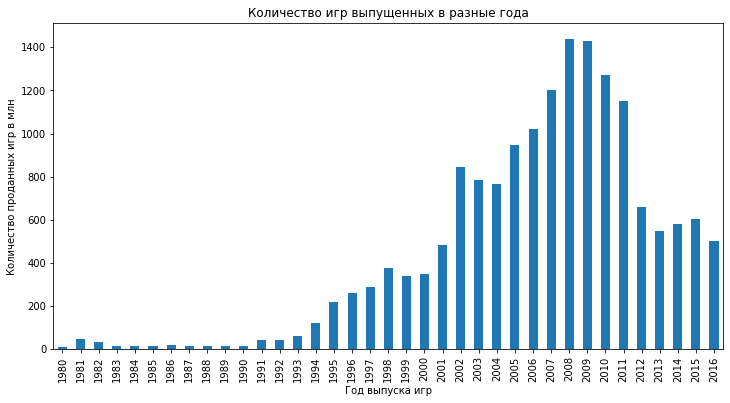

In [ ]:
plt.figure(figsize=(12, 6))

data.groupby(by=data['year_of_release'])['name'].count().plot(kind='bar')
plt.title('Количество игр выпущенных в разные года')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество проданных игр в млн')
plt.show()

Большинство игр выпускалось в 2008 и 2009 год. До 2002 года количество проданных игр было совсем низким (вероятно это связано с кризисом игровой индустрии), после этого года замечен рост игровой индустрии. Также замечен спад продаж после 2011 года, который так и остался на данном уровне по 2016 год. Исходя из этого данные до 2002 года не важны для нашего исследования.  

### Как менялись продажи по платформам? Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос, за какой характерный срок появляются новые и исчезают старые платформы?

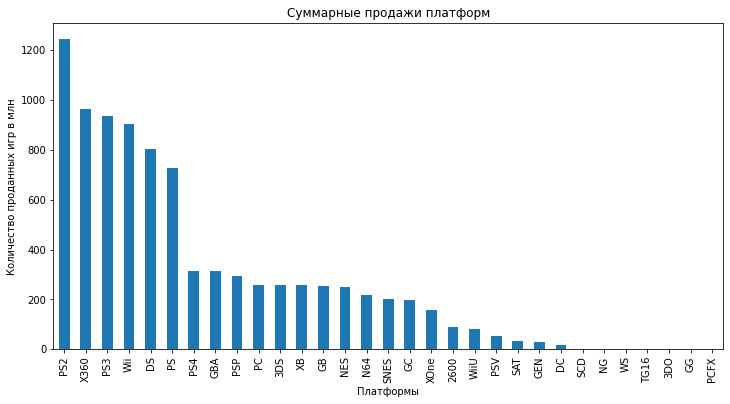

In [ ]:
# просмотирм какие платформы имеют наибольшие суммарные продажи
plt.figure(figsize=(12, 6))
sales_by_platform = data.groupby(by=data['platform'])['total_sales'].sum().sort_values(ascending=False)
sales_by_platform.plot(kind='bar')
plt.title('Суммарные продажи платформ')
plt.xlabel('Платформы')
plt.ylabel('Количество проданных игр в млн')
plt.show()

Лучшими по продажам являются 6 платформ (продано игр включительно больше 727.58 млн): PS2, X360, PS3, Wii, DS и PS, построим распределение продаж этих платформ по годам.

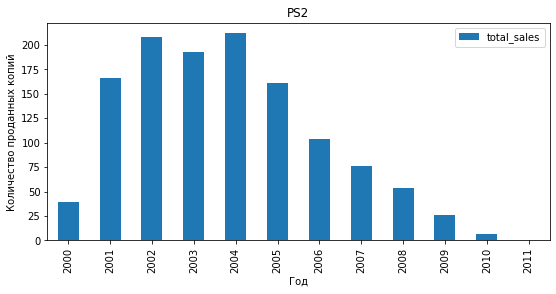

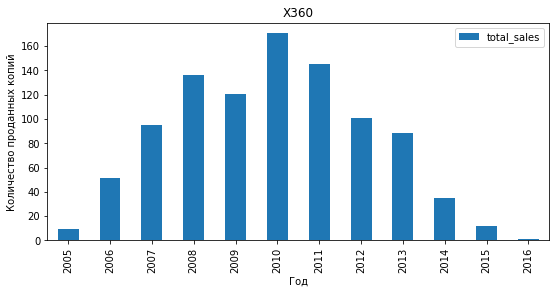

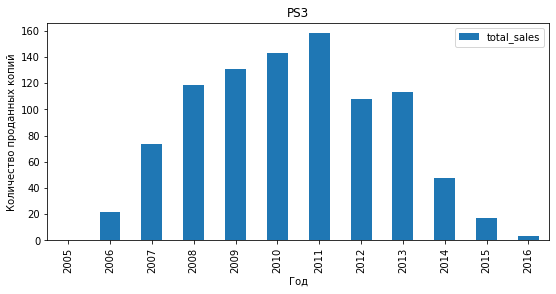

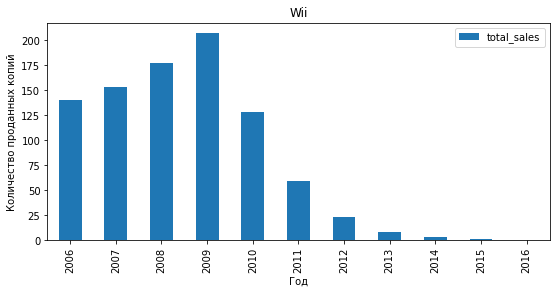

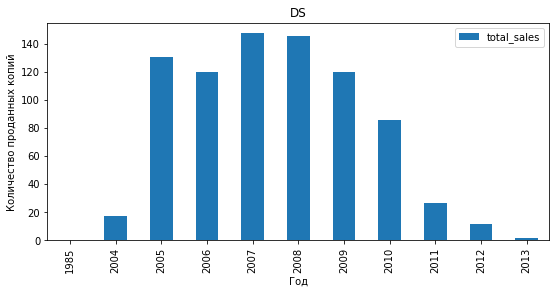

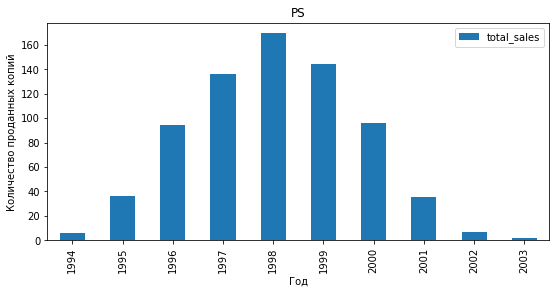

In [ ]:
top_sales = sales_by_platform.head(6).reset_index()
top_platforms_list = top_sales['platform'].unique()
for platform in top_platforms_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release',
        values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(9,4))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Количество проданных копий')

По графикам видно, что "жизненный цикл" платформ начинается и завершается в период за ~6-~ 8 лет, также нужно отметить, что самые популярные платформы уже потеряли свою значимость, продажи PS сильно упали еще к 2003, PS2 и DS к 2011-2013, а X360, Wii и PS3 к 2016 году.

### Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Отбросим неактуальные данные.

Выбирая акутальный период для прогнозирования в индустрии компьютерных игр нельзя брать слишком большой временной интервал, среднее количество лет 2-5, по графику "Количество игр выпущенных в разные года" (этап 5.1) заметен спад выпущенных игр с 2012, и еще больший спад в 2013, поэтому возьмем данные за 4 года: 2013, 2014, 2015 и 2016.

In [ ]:
# actual_data = data.query('year_of_release >= 2010 and platform != "DS" and platform != "PS2"')

In [ ]:
actual_data = data.query('year_of_release >= 2013')

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [ ]:
actual_data.groupby(by=data['platform'])['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       40.06
PSV      32.99
Wii      13.66
PSP       3.74
DS        1.54
Name: total_sales, dtype: float64

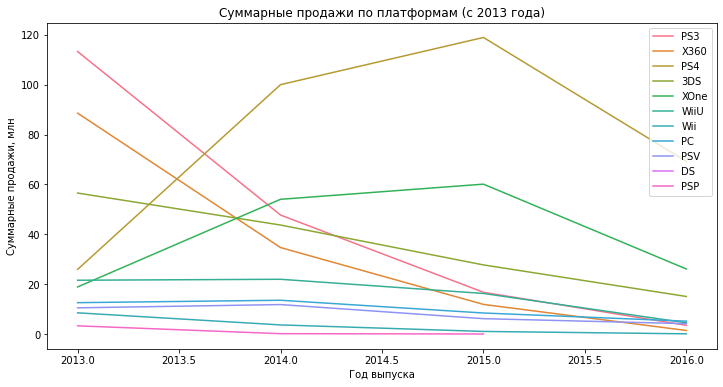

In [ ]:
actual_platforms_list = actual_data['platform'].unique()
plt.figure(figsize=(12, 6))  # установка размера графика

# создание палитры цветов для разных платформ
colors = sns.color_palette('husl', n_colors=len(actual_platforms_list))

for platform, color in zip(actual_platforms_list, colors):
    platform_data = actual_data[actual_data['platform'] == platform]
    platform_sales = platform_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    sns.lineplot(data=platform_sales, x=platform_sales.index, y='total_sales', label=platform, color=color)

plt.title('Суммарные продажи по платформам (с 2013 года)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн')
plt.legend()
plt.show()

**Лидируют по продажам:** PS4 (314.14 млн копий)

**Растут по продажам:** растущих по продажам плафторм нет, однако есть те, кто держатся на 1 уровне (PSV, Wii, PC)

**Падают по продажам:** XOne, PS3, X360, PS4.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

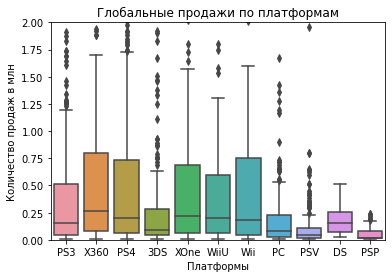

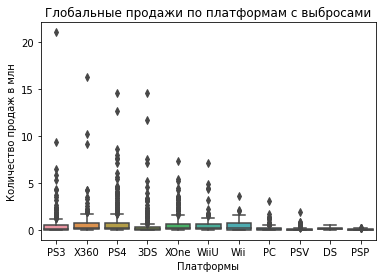

In [ ]:
sns.boxplot(data=actual_data, x='platform', y='total_sales')
plt.title('Глобальные продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж в млн')
plt.ylim(0, 2)
plt.show()

# тот же график но без ограничения по у, чтобы рассмотреть выбросы
sns.boxplot(data=actual_data, x='platform', y='total_sales')
plt.title('Глобальные продажи по платформам с выбросами')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж в млн')
plt.show()

Медиана продаж у большинства платформ находится у значения 0.2-0.27 - X360, PS3, PS4, Wii, XOne, WiiU, есть платформы с медианой 0.05-0.1 - 3DS, PC, PSP, PSV. Выбросы есть в максимуме значений.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Возьмем 1 популярную платформу - например, X360, эта платформа находится на втором месте в лидирующих по продажам платформах, также ее межквартильный размах шире.

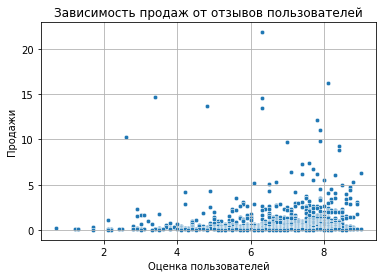

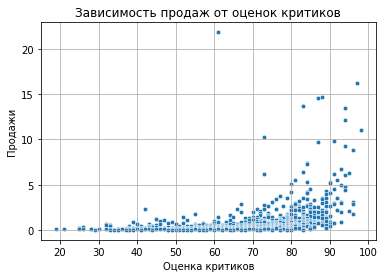

In [ ]:
actual_data_xbox = data.query('platform == "X360"')

# график зависимости продаж от отзывов пользователей
actual_data_xbox.plot(kind='scatter', x='user_score', y='total_sales', grid=True, edgecolor='white', linewidth=0.5)
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

# график зависимости продаж от отзывов критиков
actual_data_xbox.plot(kind='scatter', x='critic_score', y='total_sales', grid=True, edgecolor='white', linewidth=0.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценок критиков')
plt.show()

In [ ]:
# подсчет корреляции между продажами и отзывами пользователей
actual_data['total_sales'].corr(actual_data['user_score'])

-0.00260461720256464

In [ ]:
# подсчет корреляции между продажами и отзывами критиков
actual_data['total_sales'].corr(actual_data['critic_score'])

0.3132340515415155

**Вывод:** Корреляция между продажами и отзывами пользователей очень слабая (0.05), это обозначает, что переменные не связаны между собой. Корреляция между продажами и оценкой критиков слабая (0.31), что обозначает, что переменные не сильно связаны между собой.

### Соотнесем выводы с продажами игр на других платформах.

In [ ]:
actual_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Корреляция между PS3 - user_score: 0.00
Корреляция между PS3 - critic_score: 0.33


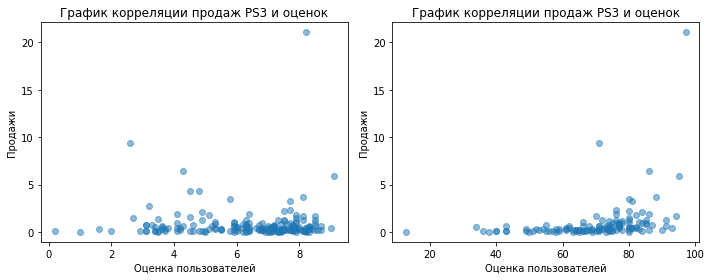

Корреляция между X360 - user_score: -0.01
Корреляция между X360 - critic_score: 0.35


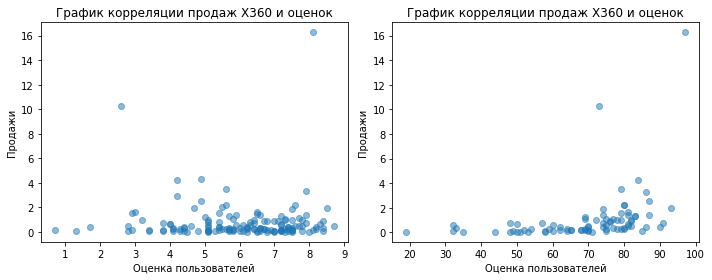

Корреляция между PS4 - user_score: -0.03
Корреляция между PS4 - critic_score: 0.41


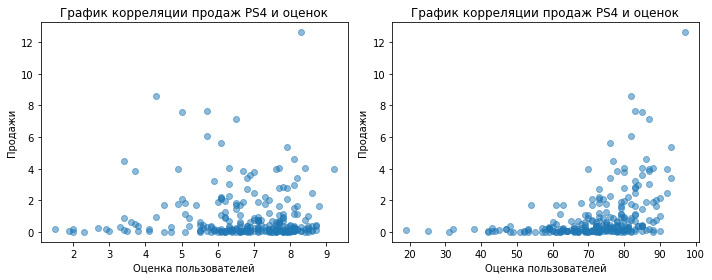

Корреляция между 3DS - user_score: 0.24
Корреляция между 3DS - critic_score: 0.36


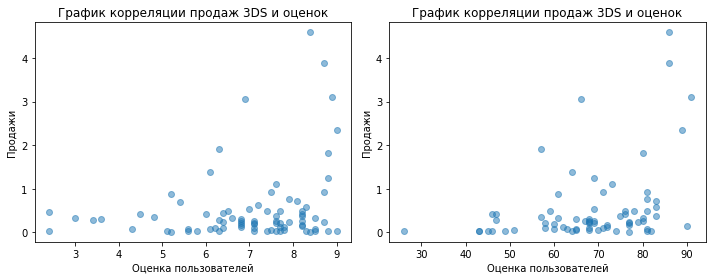

Корреляция между XOne - user_score: -0.07
Корреляция между XOne - critic_score: 0.42


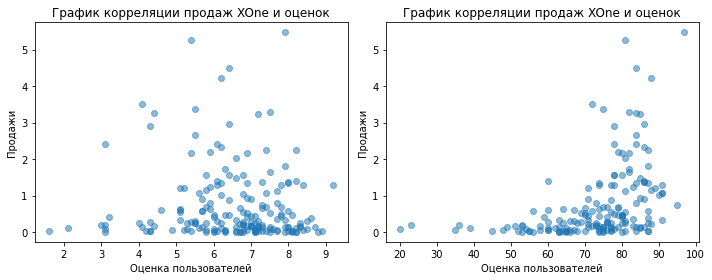

Корреляция между WiiU - user_score: 0.42
Корреляция между WiiU - critic_score: 0.38


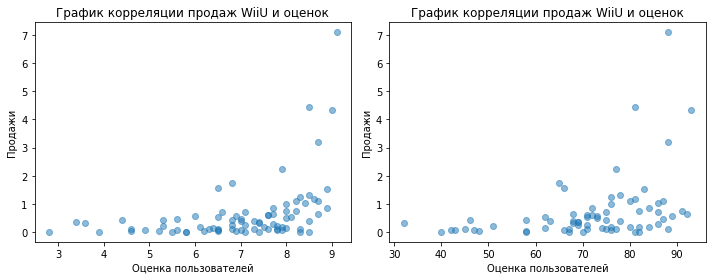

Корреляция между Wii - user_score: 0.68
Корреляция между Wii - critic_score: 0.00


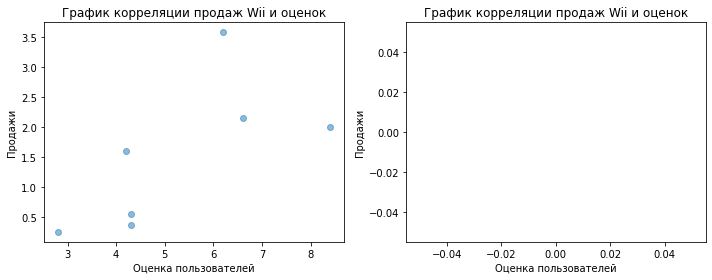

Корреляция между PC - user_score: -0.09
Корреляция между PC - critic_score: 0.20


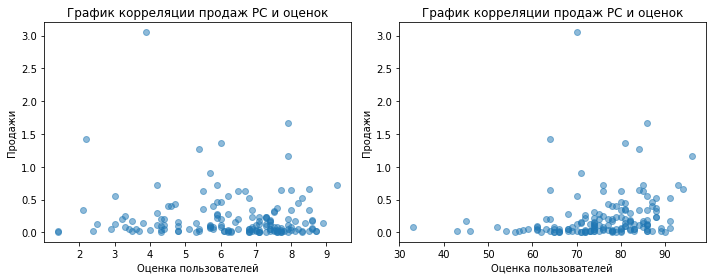

Корреляция между PSV - user_score: 0.00
Корреляция между PSV - critic_score: 0.25


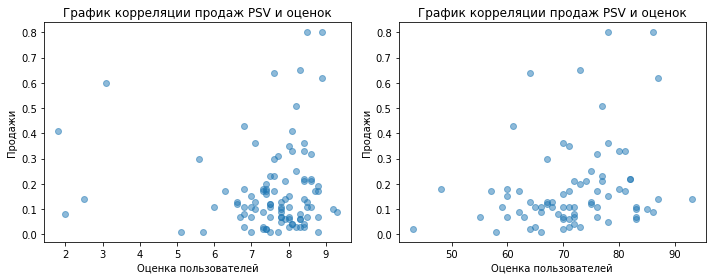

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Корреляция между DS - user_score: 0.00
Корреляция между DS - critic_score: 0.00


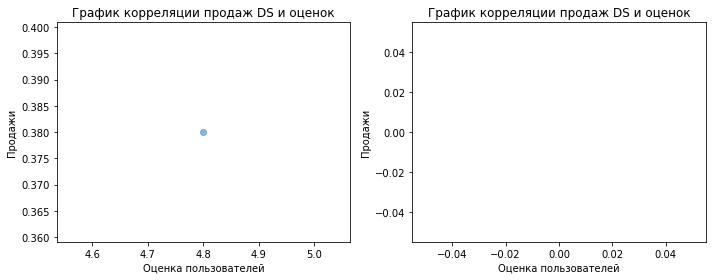

Корреляция между PSP - user_score: -1.00
Корреляция между PSP - critic_score: 0.00


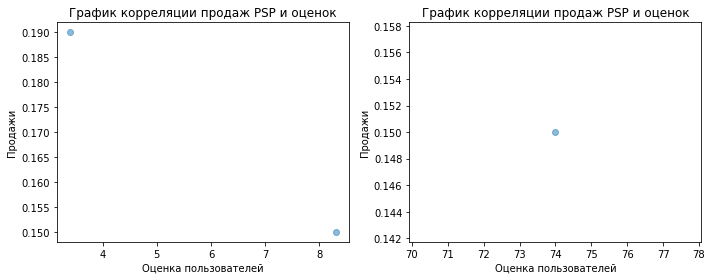

In [ ]:
def plot_scatter_and_correlation(actual_data, platform_column, value_columns):
    platforms = actual_data[platform_column].unique()

    for platform in platforms:
        platform_data = actual_data[actual_data[platform_column] == platform]
        if len(platform_data) > 1:
            plt.figure(figsize=(10, 4))

            for idx, value_column in enumerate(value_columns, start=1):
                plt.subplot(1, len(value_columns), idx)
                plt.scatter(platform_data[value_column], platform_data['total_sales'], alpha=0.5)
                plt.title(f'График корреляции продаж {platform} и оценок')
                plt.xlabel('Оценка пользователей')
                plt.ylabel('Продажи')

                correlation = platform_data[value_column].corr(platform_data['total_sales'])
                if np.isnan(correlation):
                    correlation = 0
                print(f'Корреляция между {platform} - {value_column}: {correlation:.2f}')

            plt.tight_layout()
            plt.show()

plot_scatter_and_correlation(actual_data, platform_column='platform', value_columns=['user_score', 'critic_score'])

**Вывод:** В целом корреляция между продажами и **пользовательской оценкой** очень слабая, в случае PC, XOne, PS4 даже отрицательная, однако почти во всех случаях корреляция между продажами и **оценкой критиков** находится на среднем уровне (кроме PSV - в данном случае корреляция является очень слабой). По графикам и корреляции Wii, DS и PSP видно, что с 2013 года почти все игры, выпущенные на этих платформах, не имют оценок пользователей и критиков.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
# actual_data.groupby(by=actual_data['genre'])['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
# plt.xlabel('Жанр')
# plt.ylabel('Продажи в млн')
# plt.title('Распределение игр по жанрам')
# plt.show()

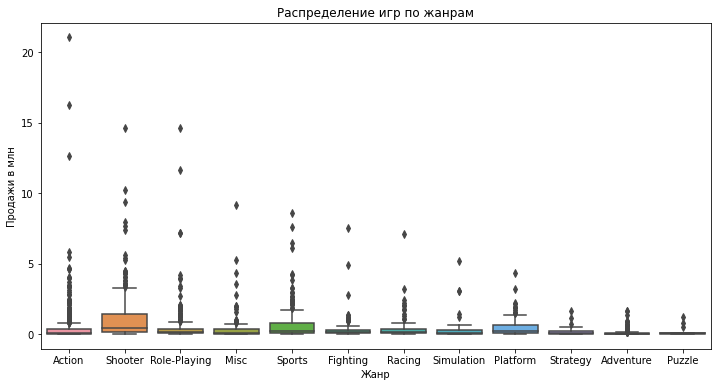

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=actual_data, x='genre', y='total_sales')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн')
plt.title('Распределение игр по жанрам')
plt.show()

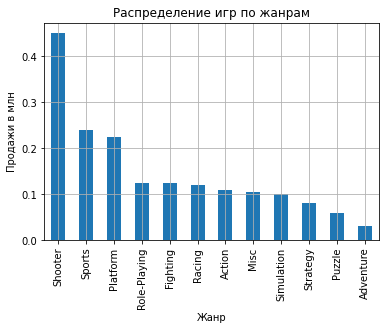

In [ ]:
actual_data.groupby(by=actual_data['genre'])['total_sales'].median().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн')
plt.title('Распределение игр по жанрам')
plt.show()

**Вывод:** По диаграммам размаха видно, что максимальные продажи игр у жанра Action, однако это произошло благодаря отдельным особо "выстрелившим" играм. Самым прибыльным жанром тем не менее является Shooter, после него идут Sports и Platform. Минимальные продажи у Puzzle, а наименее прибыльный жанр - Adventure.

**ВЫВОД по EDA:**

Анализ показал, что наибольшее количество игр выпущено в период с 2008 по 2009 год, с заметным паденим продаж начиная с 2012 года. Тем не менее, данные об играх, выпущенных до 2002 года, не имеют большой значимости из-за небольшого количества записей.

По результатам анализа платформ выявлено, что наиболее успешными с точки зрения продаж оказались PS2, X360, PS3, Wii, DS и PS. Также наблюдается характерный "жизненный цикл" платформ, составляющий 8 лет. Популярные платформы с течением времени начинают утрачивать свою значимость.

Среди анализируемых платформ наибольший объем продаж продемонстрировала PS4. В то же время роста по продажам ни у одной из платформ не наблюдается. Платформы, которые удерживаются на одном уровне, включают PSV, Wii и PC. Падают по продажам следующим платформы: XOne, PS3, X360, и PS4.

Оценки пользователей оказали очень слабое влияние на продажи, как для наиболее популярных, так и для менее популярных платформ. В то время как оценки критиков имеют слабую или среднюю корреляцию с продажами в зависимости от платформы.

Анализ данных также позволяет выделить жанры игр, наиболее прибыльные для продаж. Так, игры в жанре Shooter являются наиболее успешными, а жанры Adventure, Puzzle, Strategy показали себя менее прибыльными.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA - Северная Америка, EU - Европа, JP - Япония):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
# actual_data.groupby(by=actual_data['platform'])['na_sales'].sum().sort_values(ascending=False).head().plot(kind='bar')
# plt.title('Топ-5 популярных платформ в Северной Америке')
# plt.xlabel('Платформы')
# plt.ylabel('Количество проданных копий в млн')
# plt.show()

# actual_data.groupby(by=actual_data['platform'])['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='bar')
# plt.title('Топ-5 популярных платформ в Европе')
# plt.xlabel('Платформы')
# plt.ylabel('Количество проданных копий в млн')
# plt.show()

# actual_data.groupby(by=actual_data['platform'])['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='bar')
# plt.title('Топ-5 популярных платформ в Японии')
# plt.xlabel('Платформы')
# plt.ylabel('Количество проданных копий в млн')
# plt.show()

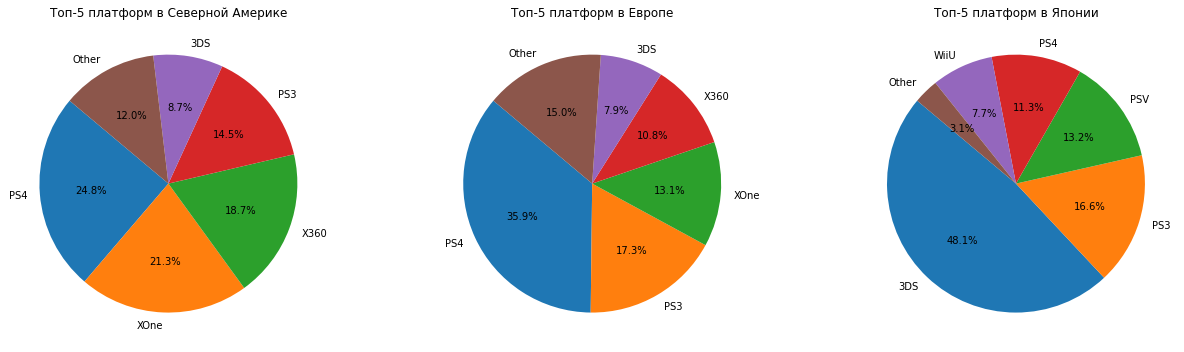

In [ ]:
# группировка данных и суммирование продаж по платформам
na_platform_sales = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_platform_sales = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_platform_sales = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# определение топ-5 платформ
top_n = 5
top_na_platform = na_platform_sales.head(top_n)
top_eu_platform = eu_platform_sales.head(top_n)
top_jp_platform = jp_platform_sales.head(top_n)

# добавление "другие платформы"
other_platform_sales = na_platform_sales.iloc[top_n:].sum()
top_na_platform['Other'] = other_platform_sales

other_platform_sales = eu_platform_sales.iloc[top_n:].sum()
top_eu_platform['Other'] = other_platform_sales

other_platform_sales = jp_platform_sales.iloc[top_n:].sum()
top_jp_platform['Other'] = other_platform_sales

# создание подходящих подписей и данных для круговых диаграмм
na_pl_labels = top_na_platform.index
na_pl_sizes = top_na_platform.values

eu_pl_labels = top_eu_platform.index
eu_pl_sizes = top_eu_platform.values

jp_pl_labels = top_jp_platform.index
jp_pl_sizes = top_jp_platform.values

# создание круговых диаграмм для каждой зоны
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.pie(na_pl_sizes, labels=na_pl_labels, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 платформ в Северной Америке')

plt.subplot(1, 3, 2)
plt.pie(eu_pl_sizes, labels=eu_pl_labels, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 платформ в Европе')

plt.subplot(1, 3, 3)
plt.pie(jp_pl_sizes, labels=jp_pl_labels, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 платформ в Японии')

plt.tight_layout()
plt.show()

Топ платформ в Северной Америке и Европе не сильно отличается друг от друга, тем не менее в Японии совсем другая ситуация с популярными платформами, это может быть связано, со следующими факторами:
- Локализация: Игры, которые учитывают особенности локальной культуры и языка, могут быть более привлекательными для местных игроков.
- Маркетинг и реклама: Маркетинговые кампании и реклама игр и платформ могут быть ориентированы на конкретные регионы, учитывая местные предпочтения и тенденции.
- Географические особенности: Некоторые игровые платформы могут быть более популярны в определенных регионах из-за доступности и локальных условий. Например, наличие конкретных магазинов, поддержка языков и технические аспекты могут влиять на выбор игроков.

Так платформа 3DS, а именно портативная консоль Nintendo 3DS, самая популярная платформа в Японии, в то время как в других регионах она занимает последнее место в топ-5. Это связано с тем, что Япония стала портативной страной, и как минимум из-за того времени, которые японцы проводят вне дома, но хотят поиграть, она вырывается в лидеры именно в этом регионе.

In [ ]:
# actual_data.groupby(by=actual_data['genre'])['na_sales'].sum().sort_values(ascending=False).head().plot(kind='bar')
# plt.title('Топ-5 популярных жанров в Северной Америке')
# plt.xlabel('Жанры')
# plt.ylabel('Количество проданных копий в млн')
# plt.show()

# actual_data.groupby(by=actual_data['genre'])['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='bar')
# plt.title('Топ-5 популярных жанров в Европе')
# plt.xlabel('Жанры')
# plt.ylabel('Количество проданных копий в млн')
# plt.show()

# actual_data.groupby(by=actual_data['genre'])['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='bar')
# plt.title('Топ-5 популярных жанров в Японии')
# plt.xlabel('Жанры')
# plt.ylabel('Количество проданных копий в млн')
# plt.show()

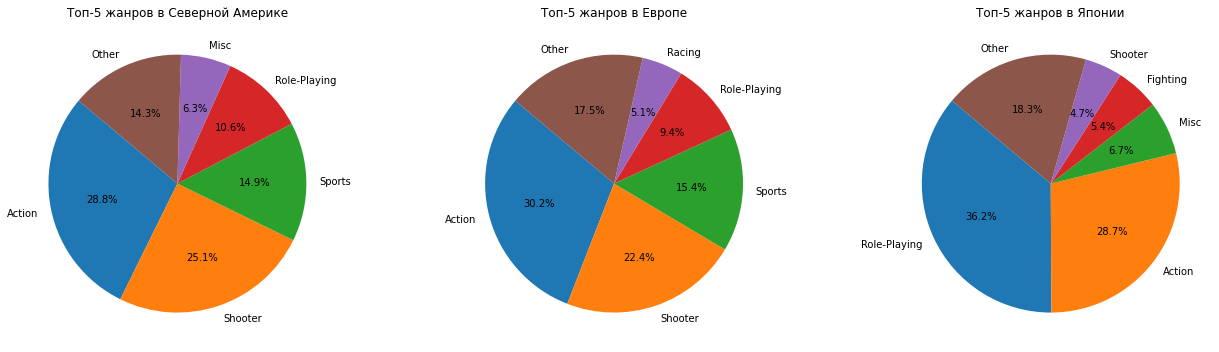

In [ ]:
# группировка данных и суммирование продаж по жанрам
na_genre_sales = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre_sales = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre_sales = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# определение топ-5 жанров
top_n = 5
top_na_genres = na_genre_sales.head(top_n)
top_eu_genres = eu_genre_sales.head(top_n)
top_jp_genres = jp_genre_sales.head(top_n)

# добавление "другие жанры"
other_genre_sales = na_genre_sales.iloc[top_n:].sum()
top_na_genres['Other'] = other_genre_sales

other_genre_sales = eu_genre_sales.iloc[top_n:].sum()
top_eu_genres['Other'] = other_genre_sales

other_genre_sales = jp_genre_sales.iloc[top_n:].sum()
top_jp_genres['Other'] = other_genre_sales

# создание подходящих подписей и данных для круговых диаграмм
na_labels = top_na_genres.index
na_sizes = top_na_genres.values

eu_labels = top_eu_genres.index
eu_sizes = top_eu_genres.values

jp_labels = top_jp_genres.index
jp_sizes = top_jp_genres.values

# создание круговых диаграмм для каждой рыночной зоны
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.pie(na_sizes, labels=na_labels, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 жанров в Северной Америке')

plt.subplot(1, 3, 2)
plt.pie(eu_sizes, labels=eu_labels, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 жанров в Европе')

plt.subplot(1, 3, 3)
plt.pie(jp_sizes, labels=jp_labels, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 жанров в Японии')

plt.tight_layout()
plt.show()

Расшифровка жанров игр:
- Action (Экшен): Игры этого жанра акцентируют внимание на физических действиях персонажей, таких как бег, прыжки, драки и стрельба. Они обычно представляют собой быстрые и динамичные игровые процессы.

- Shooter (Шутер): В играх этого жанра игрок управляет персонажем, который стреляет оружием во врагов или цели. Шутеры могут быть от первого или третьего лица.

- Sports (Спорт): Этот жанр включает игры, которые имитируют реальные виды спорта или физические соревнования. В них игроки могут участвовать в виртуальных спортивных мероприятиях.

- Misc (Разное): Этот жанр включает игры, которые не легко классифицировать в другие категории. Они могут быть разнообразными и включать в себя элементы разных жанров.

- Role-Playing (Ролевая игра): В ролевых играх игроки управляют персонажами, развивают их навыки, выполняют квесты и принимают решения, влияющие на сюжет. Они обычно охватывают фэнтезийные или научно-фантастические миры.

- Platform (Платформер): Этот жанр включает игры, где игроки управляют персонажем, который прыгает и бегает по платформам и уровням, преодолевая препятствия и врагов.

Топы популярных жанров в Северной Америке и Европе не сильно отличаются друг от друга (в лидерах Action-игры - это жанр компьютерных игр, в которых важна реакция и своевременные действия), в то время как у Японии отличился жанр Role-playing, игры в жанре Action в Японии являются вторыми по популярности. Такие различия могут быть связаны со следующими факторами:

- Культурные предпочтения: В каждом регионе могут существовать уникальные культурные предпочтения по жанрам. Например, в Северной Америке и Европе жанры Action, Shooter и Sports могут быть популярными из-за акцента на динамичную игровую механику, соревновательные аспекты и многопользовательские режимы. В Японии, где сильно развиты ролевые игры и аниме-культура, жанр Role-Playing может быть более привлекательным.

- Исторические факторы: Игровая индустрия имеет свои исторические особенности в каждом регионе. Например, в Японии ролевые игры (Role-Playing) всегда были популярными и имели долгую историю. Это может отразиться на предпочтениях игроков и влиять на топы жанров.

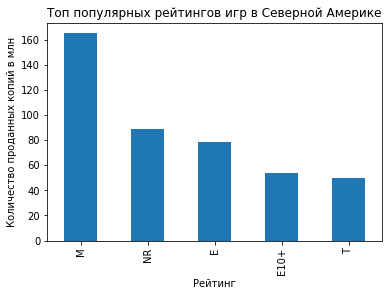

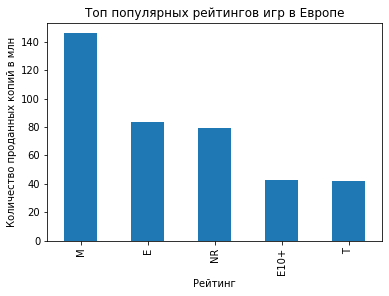

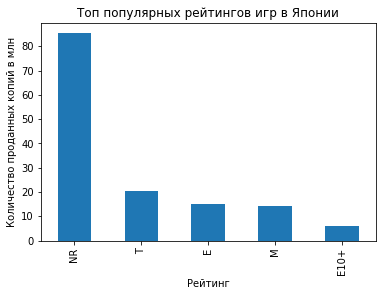

In [ ]:
actual_data.groupby(by=actual_data['rating'])['na_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Топ популярных рейтингов игр в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий в млн')
plt.show()

actual_data.groupby(by=actual_data['rating'])['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Топ популярных рейтингов игр в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий в млн')
plt.show()

actual_data.groupby(by=actual_data['rating'])['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Топ популярных рейтингов игр в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий в млн')
plt.show()

Расшифровка рейтингов:
- M (Mature): Рекомендуется для лиц старше 17 лет.

- E (Everyone): Подходит для всех возрастов.

- T (Teen): Рекомендуется для лиц старше 13 лет.

- E10+ (Everyone 10 and older): Подходит для всех от 10 лет и старше.

- NR (Not Rated): Игры без рейтинга по системе ESRB.

По всем регионам был отмечен низкий спрос на игры для детей 10+ лет и подростков. В Европе и Северной америке чаще всего играют в игры рейтинга М, в то время как в Японии игры с таким рейтингом занимают четвертое место. Самыми часто встречающимися в Японии являются игры с рейтингом NR - то есть игры без рейтинга ESRB, это связано с тем, что в данной стране ESRB не маркирует игры.

**Вывод:**

На основе проведенного анализа, мы можем составить портреты типичных пользователей из Северной Америки, Европы и Японии, которые могут быть интересны интернет-магазину "Стримчик" для более эффективной стратегии продаж и рекламы:

**Пользователь из Северной Америки:**
- Популярные платформы: X360, PS3, Wii.
- Популярные жанры: Action, Shooter, Sports.
- Популярные рейтинги: M (Mature), NR (Not rated), E (Everyone).
- Вероятно, предпочитает игры с более взрослым контентом, так как популярен рейтинг "Mature".

**Пользователь из Европы:**
- Популярные платформы: PS3, X360, PS4.
- Популярные жанры: Action, Shooter, Sports.
- Популярные рейтинги: M (Mature), E (Everyone), NR (Not rated).
- Сходные предпочтения с пользователями из Северной Америки, возможно, из-за схожей культурной среды.

**Пользователь из Японии:**
- Популярные платформы: 3DS, PS3, PSP.
- Популярные жанры: Role-Playing, Action, Misc (разные).
- Популярные рейтинги: N (Not Rated), с заметным отставанием T (Teen) и E (Everyone).
- Заметно выделяется предпочтение к платформе "Nintendo 3DS" и к жанру "Role-Playing", что может быть связано с культурными особенностями японского рынка игр.

Стоит отметить, что хотя некоторые предпочтения схожи, все три региона также имеют свои уникальные вкусы и предпочтения в платформах, жанрах и рейтингах. Эти портреты помогут "Стримчику" лучше адаптировать свои продажи и рекламные кампании под особенности каждого региона.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для решения данного вопроса необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей. За нулевую гипотезу обычно берется выражение со знаком равно. За альтернативную выберем не равно.

H0: Пользовательский рейтинг платформы Xbox One = пользовательский рейтинг платформы PC

H1: Пользовательский рейтинг платформы Xbox One != пользовательский рейтинг платформы PC

За alpha возьмем 0.05

In [ ]:
xbox = actual_data.query('platform == "XOne"')['user_score']
pc = actual_data.query('platform == "PC"')['user_score']

# удалим пропущенные значения для проверки
xbox_cleaned = xbox.dropna()
pc_cleaned = pc.dropna()

alpha = .05

results = st.ttest_ind(xbox_cleaned, pc_cleaned)

print('pvalue =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

pvalue = 0.15503167687396294
Не отвергаем нулевую гипотезу


Значение pvalue говорит нам, что отвергнуть нулевую гипотезу нельзя, средние пользовательские рейтинги почти польностью равны.

In [ ]:
xbox.mean()

6.521428571428572

In [ ]:
pc.mean()

6.280379746835442

Средние значения подтверждают, что проверка гипотезы обоснована, 6.52 и 6.28 близки к тому, чтобы быть равными.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

За нулевую гипотезу возьмем выражение со знаком равно, за альтернативную - неравно.

H0: Пользовательский рейтинг жанра Action = пользовательский рейтинг жанра Sports

H1: Пользовательский рейтинг жанра Action != пользовательский рейтинг жанра Sports

За alpha возьмем 0.05

In [ ]:
action = actual_data.query('genre == "Action"')['user_score']
sports = actual_data.query('genre == "Sports"')['user_score']

# удалим пропущенные значения
action_cleaned = action.dropna()
sports_cleaned = sports.dropna()

alpha = .05

results = st.ttest_ind(action_cleaned, sports_cleaned)

print('pvalue =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

pvalue = 8.11729623919141e-28
Отвергаем нулевую гипотезу


Значение pvalue доказывает, что можно отвергнуть нулевую гипотезу, значит, высока вероятность, что пользовательский рейтинг жанров Action и Sports сильно различается.

In [ ]:
action.mean()

6.8374999999999995

In [ ]:
sports.mean()

5.238124999999999

Средние значения доказывают, что проверка гипотезы прошла верно, так как значения 6.83 и 5.23 различаются.

**Вывод:**
Результаты проверки гипотез дают нам важную информацию о сравнении пользовательских рейтингов платформ и жанров. Давайте подробнее рассмотрим каждую из гипотез:

1. **Сравнение пользовательских рейтингов платформ Xbox One и PC**:
   В случае сравнения средних пользовательских рейтингов между платформами Xbox One и PC, значение p-value равное 0.545 говорит нам о том, что средние рейтинги на этих платформах не сильно различаются. Это может подразумевать, что пользовательская оценка игр на обеих платформах стабильно схожа. Однако следует учесть, что наличие небольшой разницы не обязательно делает эти платформы одинаковыми во всех аспектах.

2. **Сравнение пользовательских рейтингов жанров Action и Sports**:
   В случае сравнения средних пользовательских рейтингов между жанрами Action и Sports, очень низкое значение p-value (практически ноль) говорит о том, что существует статистически значимое различие в рейтингах между этими жанрами. Это означает, что пользователи воспринимают игры жанра Action и Sports по-разному, и этот результат не мог быть получен случайно. Вероятно, различия связаны с индивидуальными предпочтениями пользователей и характером игр в этих жанрах.

Таким образом, результаты анализа гипотез позволяют нам делать выводы о сходстве и различии между рейтингами на разных платформах и в разных жанрах. Эти результаты могут быть полезными для принятия решений о разработке и маркетинговой стратегии игр, учитывая предпочтения пользователей в разных регионах.

**Доп.вывод по 1 проверке:**

**Формулирование гипотез:**
- Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Нулевую гипотезу часто формулируют так, чтобы именно она содержала знак равенства. Альтернативная гипотеза - это утверждение, которое принимается верным, если отвергается H0.


**Обоснование выбора t-критерия:**
Для решения данного вопроса о сравнении средних пользовательских рейтингов двух платформ, был выбран t-критерий для независимых выборок, а именно ttest_ind. Этот выбор обоснован следующими факторами:

- Независимые выборки: Пользовательские рейтинги для платформ Xbox One и PC являются независимыми выборками, так как они относятся к разным платформам и могут изменяться независимо друг от друга.

- Сравнение средних: В данной задаче интерес состоит в сравнении средних значений рейтингов для двух групп (платформ), чтобы определить, есть ли статистически значимые различия.

- Распределение данных: T-критерий подходит для данных, которые приближаются к нормальному распределению. Если распределение данных приемлемо близко к нормальному, то t-критерий будет давать хорошие результаты.

- Достаточный объем выборок: Для применения t-критерия важно, чтобы выборки были достаточно большими, чтобы применять аппроксимации нормального распределения.

Таким образом, t-критерий для независимых выборок является подходящим инструментом для проверки гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

**Доп.вывод по 2 проверке:**

**Формулирование гипотез:**
- Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

**Обоснование выбора t-критерия:**
Для анализа сравнения средних пользовательских рейтингов двух жанров – Action и Sports, был выбран t-критерий для независимых выборок ttest_ind. Этот выбор обосновывается следующими факторами:

- Независимые выборки: Пользовательские рейтинги для жанров Action и Sports являются независимыми выборками, так как они относятся к разным жанрам и могут изменяться независимо друг от друга.

- Сравнение средних: В данном случае интерес заключается в сравнении средних значений рейтингов для двух групп (жанров), чтобы определить, есть ли статистически значимые различия.

- Распределение данных: T-критерий подходит для данных, которые приближаются к нормальному распределению. Если распределение данных приемлемо близко к нормальному, то t-критерий будет давать надежные результаты.

- Достаточный объем выборок: Для применения t-критерия важно, чтобы выборки были достаточно большими, чтобы применять аппроксимации нормального распределения.

Таким образом, t-критерий для независимых выборок является подходящим методом для проверки гипотезы о различии средних пользовательских рейтингов жанров Action и Sports.

## Общий вывод

В рамках данного проекта мы провели анализ данных о продажах компьютерных игр, чтобы выявить ключевые факторы, влияющие на успех игр и определить предпочтения игроков в разных регионах. Начнем с обзора обработки и анализа данных:

Начальные данные представляли собой таблицу с 16715 строками и 11 столбцами, содержащими информацию о названиях игр, платформах, годах выпуска, жанрах, продажах в разных регионах, оценках критиков и пользователей, а также рейтингах ESRB. Первоначальный анализ позволил обнаружить пропущенные значения и аномалии в данных.

Мы провели предобработку данных, заполнив пропущенные значения там, где это было возможно, и удалив неполные данные, не повлиявшие на итоговый анализ. Были добавлены столбцы для суммарных продаж и корректированы типы данных.

Исследовательский анализ данных выявил следующие закономерности:

1. **Темпы развития игровой индустрии:** Мы наблюдаем пик активности в индустрии с 2008 по 2009 год, с последующим снижением количества выпущенных игр. Также замечен спад продаж после 2011 года, который так и остался на данном уровне по 2016 год.

2. **Циклы жизни платформ:** Жизненный цикл платформ составляет 8 лет. Топовые платформы, такие как PS2, X360 и PS3, постепенно утрачивают свою популярность. Во время анализа были отброшены данные до 2013 года, как неактуальные.

3. **Влияние оценок на продажи:** Оценки пользователей имеют очень слабую корреляцию с продажами, в то время как оценки критиков оказывают более значимое влияние, но все еще недостаточное.

4. **Популярные жанры:** Жанры Shooter, Sports, Platform, Role-Playing пользуются большой популярностью.

5. **Региональные предпочтения:** В разных регионах топовые платформы, жанры и рейтинги могут значительно различаться. Например, платформа 3DS пользуется большой популярностью в Японии. А популярные рейтинги в Северной Америке и Европе не являются популярными в Японии, так как рейтинговая система не распространяется на данный регион.

На основании проведенного анализа, мы можем сделать следующие портреты пользователей из разных регионов:

1. **Пользователь из Северной Америки:**
   - Популярные платформы: X360, PS3, Wii.
   - Жанры: Action, Shooter, Sports.
   - Рейтинги: M (Для взрослых), NR (Отсутствует рейтинг), E (Для всех).

2. **Пользователь из Европы:**
   - Популярные платформы: PS3, X360, PS4.
   - Жанры: Action, Shooter, Sports.
   - Рейтинги: M (Для взрослых), E (Для всех), NR (Отсутствует рейтинг).

3. **Пользователь из Японии:**
   - Популярные платформы: 3DS, PS3, PSP.
   - Жанры: Role-Playing, Action, Misc.
   - Рейтинги: NR (Отсутствует рейтинг), T (Подростки), E (Для всех).

Также проверка гипотез позволяет нам утверждать, что средние пользовательские рейтинги платформ Xbox One и PC почти одинаковы, а средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») сильно отличаются.

**Рекомендации:**
   - Внимание стоит обратить на платформы с высокими продажами и популярностью в каждом регионе, чтобы сосредоточиться на разработке и продвижении игр именно для этих платформ.
   - Игры жанров Action, Shooter и Sports обещают наибольший успех, поэтому стоит акцентировать внимание на их разработку.
   - Рейтинги M, NR и E наиболее востребованы в регионах Северной Америке, следует соблюдать соответствие рейтингов целевой аудитории игр, однако следует обратить внимание, что очень большое число игр не имеют рейтинга в связи с тем, что ESRB-рейтинг не работает в Японии (и не только).
   
Результаты анализа данных позволяют сформировать стратегический подход к разработке и продвижению игр, учитывая предпочтения и поведение игроков в разных регионах. На основе анализа данных можно назвать некоторые рекомендации для интернет-магазина "Стримчик":

1. **Выбор платформ и регионов для продвижения игр:**
   - Для Северной Америки и Европы следует уделить внимание платформам X360, PS3, PS4 и XOne, а также жанрам Action, Shooter и Sports. Рейтинги M (Для взрослых) и E (Для всех) также актуальны для этих регионов.
   - В Японии стоит ориентироваться на платформу 3DS и жанр Role-Playing. ESRB не работает в данном регионе, поэтому игры без рейтинга чаще всего встречаются в Японии, от этого следует, что рейтинги NR (отсутствие рейтинга) и T (Подростки) наиболее популярны.


2. **Анализ оценок и продаж:**
   - Оценки пользователей имеют меньшее влияние на продажи, нежели оценки критиков. Однако стоит обратить внимание на платформы с отрицательной корреляцией между оценками критиков и продажами (например, PSV) и провести анализ, почему это может происходить.
   - Продажи сильно зависят от жанра игры. Игры жанра Shooter и Sports имеют наибольший потенциал для высоких продаж.


3. **Учет возрастных рейтингов:**
   - Важно соблюдать соответствие возрастных рейтингов игр целевой аудитории в разных регионах. В Северной Америке и Европе более востребованы рейтинги M (Для взрослых) и E (Для всех).


4. **Сезонность и циклы жизни платформ:**
   - Необходимо обратить внимание на циклы жизни платформ. Платформы, находящиеся на пике популярности, могут быть более перспективными для размещения новых игр.

Итак, анализ данных о продажах компьютерных игр позволяет выявить определяющие успешность закономерности и сформировать рекомендации, направленные на максимизацию прибыли и эффективное продвижение игр в различных регионах.